In [5]:
import pandas as pd
pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [6]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [18]:
businesses.isnull()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False


In [7]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [10]:
inspections.shape

(27285, 4)

In [8]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [9]:
violations.shape

(39720, 5)

In [ ]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [16]:
pd.merge(violations, inspections, on="business_id", how="inner").dropna().shape

(127372, 8)

In [ ]:
# 2 Which ten business have had the most inspections?

In [ ]:
# 3 Group and count the inspections by type

In [ ]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [ ]:
# 5 Which zip code contains the most high risk violations?

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 Create a hist of the scores with 10 bins

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [19]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import seaborn as sb

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [43]:
killings.month.value_counts()

March       114
April        96
January      90
February     84
May          81
June          2
Name: month, dtype: int64

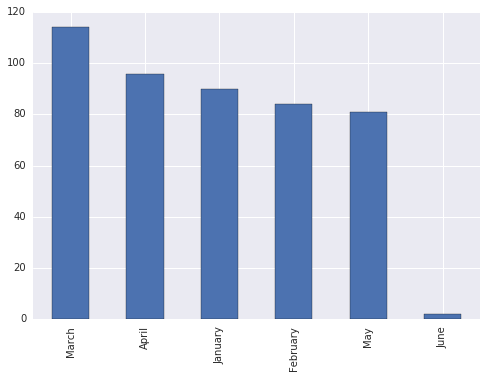

In [32]:
killings.month.value_counts().plot(kind="bar")

TypeError: cannot concatenate 'str' and 'float' objects

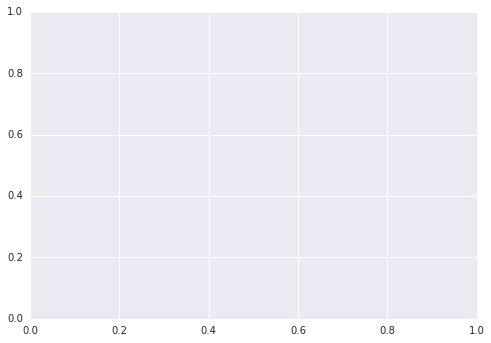

In [30]:
plt.hist(killings.month.values)

In [ ]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race`

In [ ]:
# 2. Show the count of missing values in each column

In [ ]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [ ]:
# 4. How many killings were there so far in 2015?

In [ ]:
# 5. Of all killings, how many were male and how many female?

In [ ]:
# 6. How many killings were of unarmed people?

In [ ]:
# 7. What percentage of all killings were unarmed?

In [ ]:
# 8. What are the 5 states with the most killings?

In [ ]:
# 9. Show a value counts of deaths for each race

In [ ]:
# 10. Display a histogram of ages of all killings

In [ ]:
# 11. Show 6 histograms of ages by race

In [ ]:
# 12. What is the average age of death by race?

In [ ]:
# 13. Show a bar chart with counts of deaths every month

In [ ]:
###################
### Less Morbid ###
###################

In [2]:
import pandas as pd

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [4]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(["Employed_full_time_year_round", "Major_code"], axis=1, inplace=True)

In [5]:
# 2. Show the cout of missing values in each column

In [6]:
# 3. What are the top 10 highest paying majors?
majors.groupby("Major")[["Median","P25th", "P75th"]].median().sort_values(by="Median",ascending=False)

,Median,P25th,P75th
Major,,,
PETROLEUM ENGINEERING,125000,75000,210000.0
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION,106000,78000,125000.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000,60000,125000.0
METALLURGICAL ENGINEERING,96000,65000,123000.0
NUCLEAR ENGINEERING,95000,65000,128000.0
MINING AND MINERAL ENGINEERING,92000,52000,124000.0
MATHEMATICS AND COMPUTER SCIENCE,92000,53000,136000.0
ELECTRICAL ENGINEERING,88000,60000,116000.0
CHEMICAL ENGINEERING,86000,60000,120000.0


In [7]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.groupby("Major")[["Median","P25th", "P75th"]].median().sort_values(by="Median",ascending=False)[:10].plot(kind="bar")

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
# 5. What is the average median salary for each major category?

In [ ]:
# 6. Show only the top 5 paying major categories

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [10]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate', ascending=False).head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [ ]:
# What are the unemployment rates?

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"